## 조계철 2주차 숙제

# 타이타닉 생존자 체크

In [100]:
import pandas as pd

In [101]:
titanic_data = pd.read_csv('C:/Users/USER/kdigitalc/rawdata/train.csv')

In [102]:
titan = titanic_data

In [103]:
titan

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [104]:
titan.shape

(891, 12)

In [105]:
titan.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [106]:
titan['Cabin'].fillna('N',inplace=True)
titan['Age'].fillna(titan['Age'].mean(),inplace=True)
titan['Embarked'].fillna('N',inplace=True)

In [107]:
titan.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [108]:
titan.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [109]:
titan.groupby('Sex').sum()['Survived']

Sex
female    233
male      109
Name: Survived, dtype: int64

In [110]:
titan.groupby('Pclass').sum()['Survived']

Pclass
1    136
2     87
3    119
Name: Survived, dtype: int64

In [111]:
def tellAges(age):
    if age <10:
        return '유아'
    elif age <20:
        return '10대'
    elif age<30:
        return '20대'
    elif age<40:
        return '30대'
    elif age<50:
        return '40대'
    elif age<60:
        return '50대'
    elif age<70:
        return '60대'
    else:
        return '노인'

In [112]:
titan['Age_Range'] = titan['Age'].apply(tellAges)

In [113]:
titan

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_Range
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,N,S,20대
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C,30대
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,N,S,20대
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S,30대
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,N,S,30대
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,N,S,20대
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S,10대
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,N,S,20대
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C,20대


In [114]:
titan.groupby('Age_Range').sum()['Survived']

Age_Range
10대     41
20대    129
30대     73
40대     34
50대     20
60대      6
노인       1
유아      38
Name: Survived, dtype: int64

In [115]:
titan['Age_Range']

0      20대
1      30대
2      20대
3      30대
4      30대
      ... 
886    20대
887    10대
888    20대
889    20대
890    30대
Name: Age_Range, Length: 891, dtype: object

In [116]:
type(titan.groupby('Age_Range').sum()['Survived'])

pandas.core.series.Series

In [117]:
type(titan.groupby('Age_Range').sum()['Survived'].index)

pandas.core.indexes.base.Index

In [118]:
titan

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_Range
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,N,S,20대
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C,30대
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,N,S,20대
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S,30대
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,N,S,30대
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,N,S,20대
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S,10대
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,N,S,20대
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C,20대


In [126]:
result = titan.groupby('Age_Range').sum()['Survived']
result

Age_Range
10대     41
20대    129
30대     73
40대     34
50대     20
60대      6
노인       1
유아      38
Name: Survived, dtype: int64

In [127]:
result = result.reindex(['유아','10대','20대','30대','40대','50대','60대','노인'])
result

Age_Range
유아      38
10대     41
20대    129
30대     73
40대     34
50대     20
60대      6
노인       1
Name: Survived, dtype: int64

Text(0, 0.5, '생존자')

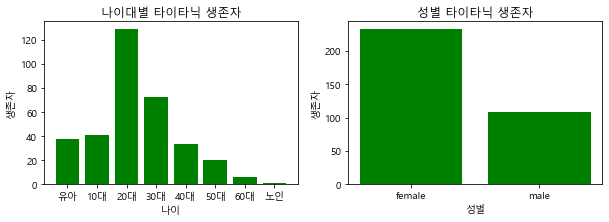

In [128]:
import matplotlib.pyplot as plt
import numpy as np

plt.rc('font',family='Malgun Gothic')

#plt.bar(['유아','10대','20대','30대','40대','50대','60대','노인'],titan.groupby('Age_Range').sum()['Survived'])

plt.figure(figsize=(10,3))
grid = plt.GridSpec(1,2)




plt.subplot(grid[0,0])
#plt.bar(titan.groupby('Age_Range').sum()['Survived'].index,titan.groupby('Age_Range').sum()['Survived'],color='green')
plt.bar(result.index,result,color='green')
plt.title('나이대별 타이타닉 생존자')
plt.xlabel('나이')
plt.ylabel('생존자')


plt.subplot(grid[0,1])
plt.bar(titan.groupby('Sex').sum()['Survived'].index,titan.groupby('Sex').sum()['Survived'],color='green')
plt.title('성별 타이타닉 생존자')
plt.xlabel('성별')
plt.ylabel('생존자')

# 코로나데이터

In [53]:
corona = pd.read_csv('C:/Users/USER/kdigitalc/rawdata/kr_daily.csv')

In [54]:
corona

,date,confirmed,death,released,candidate,negative
0,20200121,1,0,0,0,0
1,20200122,1,0,0,0,0
2,20200123,1,0,0,0,0
3,20200124,2,0,0,0,0
4,20200125,2,0,0,0,0
...,...,...,...,...,...,...
128,20200528,11344,269,10340,857322,834952
129,20200529,11402,269,10363,873718,849161
130,20200530,11441,269,10398,891460,865162
131,20200531,11468,270,10405,899354,876060


In [67]:
corona['new_date'] = pd.to_datetime(corona['date'],format="%Y%m%d")

In [68]:
corona

,date,confirmed,death,released,candidate,negative,new_date
0,20200121,1,0,0,0,0,2020-01-21
1,20200122,1,0,0,0,0,2020-01-22
2,20200123,1,0,0,0,0,2020-01-23
3,20200124,2,0,0,0,0,2020-01-24
4,20200125,2,0,0,0,0,2020-01-25
...,...,...,...,...,...,...,...
128,20200528,11344,269,10340,857322,834952,2020-05-28
129,20200529,11402,269,10363,873718,849161,2020-05-29
130,20200530,11441,269,10398,891460,865162,2020-05-30
131,20200531,11468,270,10405,899354,876060,2020-05-31


In [123]:
type(corona['new_date'].values[0])

numpy.datetime64

In [120]:
type(corona['date'].values)

numpy.ndarray

In [78]:
start_date =corona['date']>=20200518 

In [79]:
end_date = corona['date']<=20200601

In [82]:
corona_recent=corona[start_date & end_date]
corona_recent

,date,confirmed,death,released,candidate,negative,new_date
118,20200518,11065,263,9904,742146,726053,2020-05-18
119,20200519,11078,263,9938,754496,737571,2020-05-19
120,20200520,11110,263,10066,765323,748972,2020-05-20
121,20200521,11122,264,10135,777562,759473,2020-05-21
122,20200522,11142,264,10162,791276,770990,2020-05-22
123,20200523,11165,266,10194,803255,781686,2020-05-23
124,20200524,11190,266,10213,809099,788766,2020-05-24
125,20200525,11206,267,10226,815231,796142,2020-05-25
126,20200526,11225,269,10275,828250,806206,2020-05-26
127,20200527,11265,269,10295,841611,820550,2020-05-27


In [129]:
corona_recent['new_date'] = corona_recent['new_date'].astype('str')

<ipython-input-129-11bb6bf3487c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  corona_recent['new_date'] = corona_recent['new_date'].astype('str')


<BarContainer object of 15 artists>

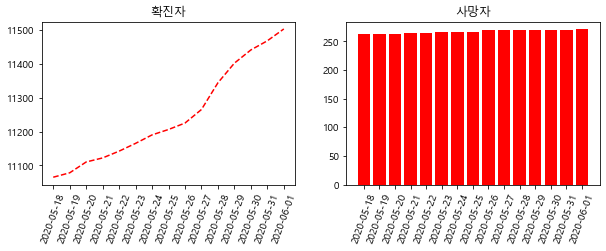

In [130]:
plt.figure(figsize=(10,3))
grid = plt.GridSpec(1,2)

plt.subplot(grid[0,0])
plt.xticks(rotation=70)
plt.title('확진자')
plt.plot(corona_recent['new_date'],corona_recent['confirmed'],'--r')

plt.subplot(grid[0,1])
plt.xticks(rotation=70)
plt.title('사망자')
plt.bar(corona_recent['new_date'],corona_recent['death'],color='red')

#### 날짜가 string이면 매일나오고, datetime형식이면 격일로 출력이 되네

<BarContainer object of 15 artists>

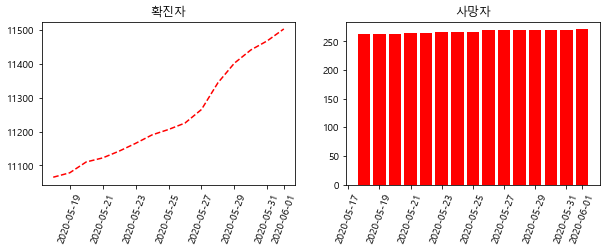

In [96]:
plt.figure(figsize=(10,3))
grid = plt.GridSpec(1,2)

plt.subplot(grid[0,0])
plt.xticks(rotation=70)
plt.title('확진자')
plt.plot(corona_recent['new_date'],corona_recent['confirmed'],'--r')

plt.subplot(grid[0,1])
plt.xticks(rotation=70)
plt.title('사망자')
plt.bar(corona_recent['new_date'],corona_recent['death'],color='red')